# HW1- LLM- Bahareh Golchin

In [1]:
#Setup
import os
import torch
from huggingface_hub import login
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


hf_token = os.environ.get('TOKEN')

# Login to Hugging Face using the secret token
login(token=hf_token)

# Load Model
models = {
    'Llama-3.2-1B': {
        'tokenizer': AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B"),
        'model': AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B")
    }
}

# Assign the tokenizer and model to variables for use
tokenizer = models['Llama-3.2-1B']['tokenizer']
model = models['Llama-3.2-1B']['model']

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [2]:
# Generate Stories
def generate_story(prompt="Once upon a time", max_length=200):
    inputs = tokenizer(prompt, return_tensors='pt')
    outputs = model.generate(inputs['input_ids'], max_length=max_length)
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return story

story = generate_story()
print("Generated Story:\n", story)

# Metrics Calculation
def compute_metrics(text):
    tokens = text.split()
    type_token_ratio = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
    perplexity = np.exp(-np.mean([np.log((len(tokens) - i) / len(tokens)) for i in range(len(tokens))]))
    return type_token_ratio, perplexity

metrics = compute_metrics(story)
metrics_df = pd.DataFrame([metrics], columns=['Type-Token Ratio', 'Perplexity'])
print("\nMetrics for the generated story:")
print(metrics_df)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Generated Story:
 Once upon a time there was a girl who lived in a small village in a small country called Ireland. She was very pretty and had a very sweet and gentle nature. She had a husband who was very kind and loving and they had two children. One of the children was a boy and the other was a girl.
One day the girl's husband went out to work in the fields. She was very sad and worried about him and worried that he would not be back soon. She began to think about what she would do if he did not come home. She began to worry about what would happen to her and her children if something happened to her husband.
One day she heard a knock on the door. She opened the door and saw a man standing there. She was very surprised to see him. He was a stranger and he did not look like anyone she knew. She said to him, "Who are you?" He said, "I am your husband's brother. I have come

Metrics for the generated story:
   Type-Token Ratio  Perplexity
0          0.564246    2.665452


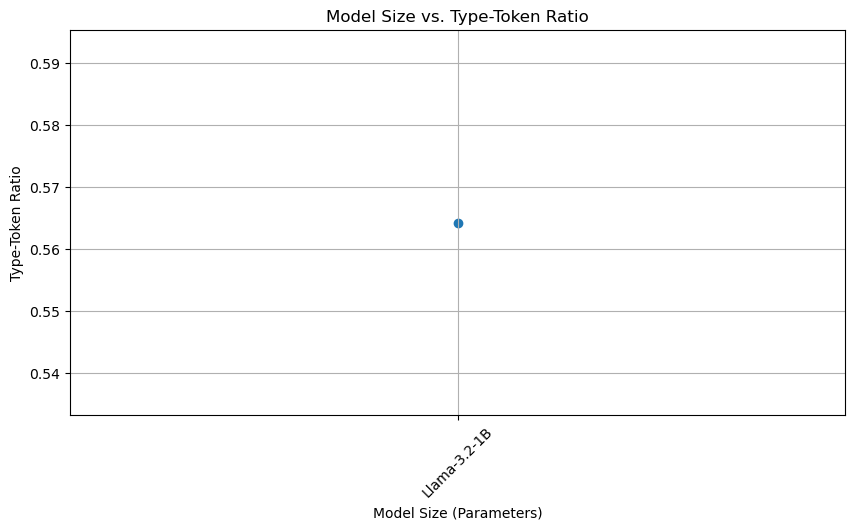

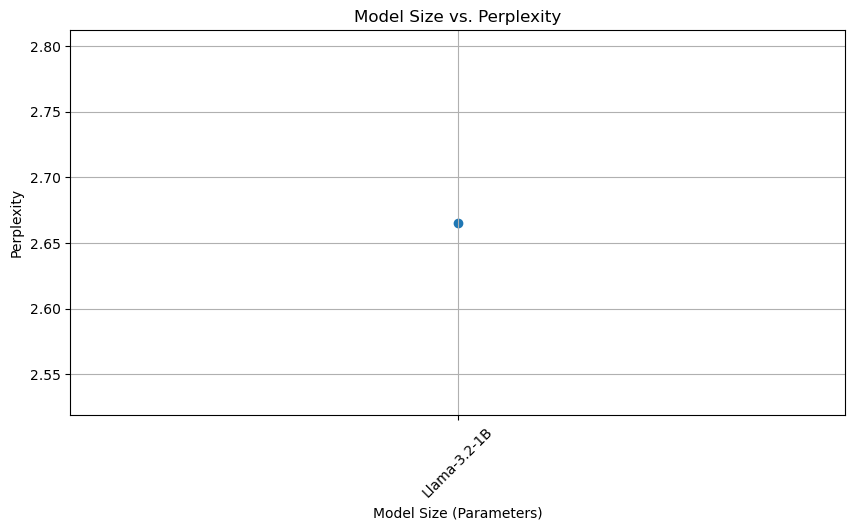

In [6]:
#Model Size
model_sizes = {'Llama-3.2-1B': 1e9}  # 1 billion parameters
sizes = list(model_sizes.values())
ttr = metrics_df['Type-Token Ratio']
perplexity = metrics_df['Perplexity']

# Plotting TTR
plt.figure(figsize=(10, 5))
plt.scatter(sizes, ttr)
plt.title('Model Size vs. Type-Token Ratio')
plt.xlabel('Model Size (Parameters)')
plt.ylabel('Type-Token Ratio')
plt.grid(True)
plt.xticks(sizes, ['Llama-3.2-1B'], rotation=45)
plt.show()

# Plotting Perplexity
plt.figure(figsize=(10, 5))
plt.scatter(sizes, perplexity)
plt.title('Model Size vs. Perplexity')
plt.xlabel('Model Size (Parameters)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.xticks(sizes, ['Llama-3.2-1B'], rotation=45)
plt.show()

In [7]:
models = {
    'Llama-3.2-3B': {
        'tokenizer': AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B"),
        'model': AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-3B")
    }
}

# Assign the tokenizer and model to variables for use
tokenizer = models['Llama-3.2-3B']['tokenizer']
model = models['Llama-3.2-3B']['model']


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
#Generate Stories
def generate_story(prompt="Once upon a time", max_length=200):
    inputs = tokenizer(prompt, return_tensors='pt')
    outputs = model.generate(inputs['input_ids'], max_length=max_length)
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return story

# Generate a story
story = generate_story()
print("Generated Story:\n", story)

# Metrics Calculation
def compute_metrics(text):
    tokens = text.split()
    type_token_ratio = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
    perplexity = np.exp(-np.mean([np.log((len(tokens) - i) / len(tokens)) for i in range(len(tokens))]))  # Ensure this line is correctly formatted

    return type_token_ratio, perplexity

# Calculate metrics for the generated story
metrics = compute_metrics(story)
metrics_df = pd.DataFrame([metrics], columns=['Type-Token Ratio', 'Perplexity'])

# Display Metrics
print("\nMetrics for the generated story:")
print(metrics_df)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated Story:
 Once upon a time, in a land far, far away, there was a boy who lived in a small village. The boy was named Jack and he loved to play with his friends. One day, while playing with his friends, Jack stumbled upon a magic wand. The wand had a strange power – when Jack waved it, a magic portal opened up, and Jack found himself in a new world. This new world was full of wonders and adventures. Jack was thrilled to explore this new world, and he made many friends along the way. One of his best friends was a girl named Jill. Jill was a skilled archer and a brave warrior. She taught Jack how to shoot arrows and fight monsters. Together, they faced many challenges and triumphed over them. But one day, Jill and Jack found themselves in a dark and dangerous place. They were surrounded by monsters and they were running out of time. Jack and Jill were in a tight spot, but they knew they had to work

Metrics for the generated story:
   Type-Token Ratio  Perplexity
0          0.6149

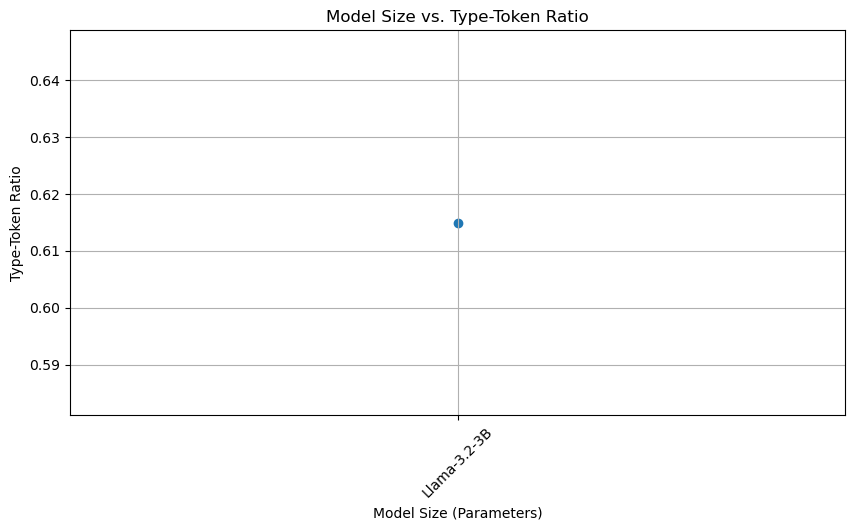

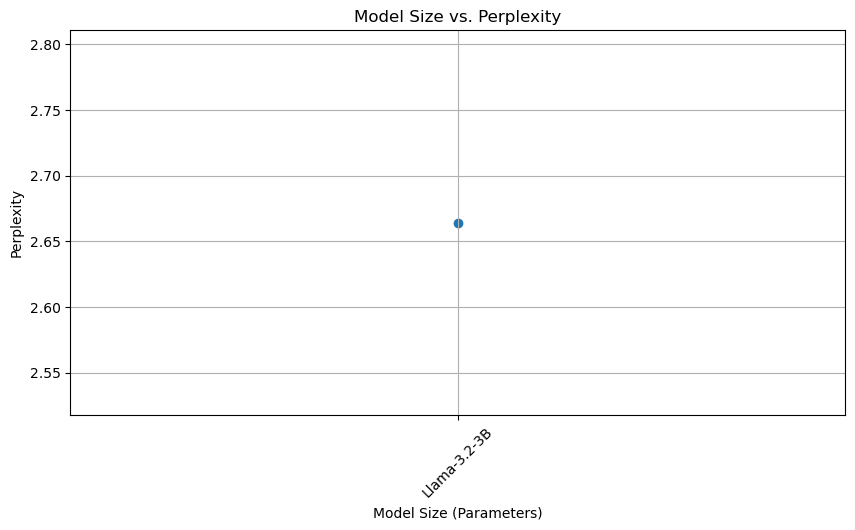

In [9]:
model_sizes = {'Llama-3.2-3B': 3e9}  # 3 billion parameters
sizes = list(model_sizes.values())
ttr = metrics_df['Type-Token Ratio']
perplexity = metrics_df['Perplexity']

# Plotting TTR
plt.figure(figsize=(10, 5))
plt.scatter(sizes, ttr)
plt.title('Model Size vs. Type-Token Ratio')
plt.xlabel('Model Size (Parameters)')
plt.ylabel('Type-Token Ratio')
plt.grid(True)
plt.xticks(sizes, ['Llama-3.2-3B'], rotation=45)
plt.show()

# Plotting Perplexity
plt.figure(figsize=(10, 5))
plt.scatter(sizes, perplexity)
plt.title('Model Size vs. Perplexity')
plt.xlabel('Model Size (Parameters)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.xticks(sizes, ['Llama-3.2-3B'], rotation=45)
plt.show()

In [10]:
# Load the models and tokenizers
models = {
    'Phi-3.5-mini-instruct': {
        'tokenizer': AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct"),
        'model': AutoModelForCausalLM.from_pretrained("microsoft/Phi-3.5-mini-instruct")
    }
}

# Assign the tokenizer and model to variables for use
tokenizer = models['Phi-3.5-mini-instruct']['tokenizer']
model = models['Phi-3.5-mini-instruct']['model']


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
# Generate Stories
def generate_story(prompt="Once upon a time", max_length=200):
    inputs = tokenizer(prompt, return_tensors='pt')
    outputs = model.generate(inputs['input_ids'], max_length=max_length)
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return story

# Generate a story
story = generate_story()
print("Generated Story:\n", story)

# Metrics Calculation
def compute_metrics(text):
    tokens = text.split()
    type_token_ratio = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
    perplexity = np.exp(-np.mean([np.log((len(tokens) - i) / len(tokens)) for i in range(len(tokens))]))  # Ensure this line is correctly formatted

    return type_token_ratio, perplexity

# Calculate metrics for the generated story
metrics = compute_metrics(story)
metrics_df = pd.DataFrame([metrics], columns=['Type-Token Ratio', 'Perplexity'])

# Display Metrics
print("\nMetrics for the generated story:")
print(metrics_df)

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Generated Story:
 Once upon a time, in a small town nestled between rolling hills and lush greenery, there lived a young girl named Lily. Lily was a curious and adventurous soul, always seeking new experiences and knowledge. She had a deep love for nature and spent most of her days exploring the nearby forests and meadows.

One sunny morning, as Lily ventured deeper into the woods, she stumbled upon a hidden clearing. In the center of the clearing stood a magnificent oak tree, its branches stretching towards the sky like outstretched arms. Intrigued, Lily approached the tree and noticed a small, weathered sign hanging from one of its branches. It read, "The Enchanted Garden: A Haven of Wonders."

Driven by her insatiable curiosity, Lily followed the sign's instructions and found herself standing at the entrance of a magical garden

Metrics for the generated story:
   Type-Token Ratio  Perplexity
0          0.773723    2.652047


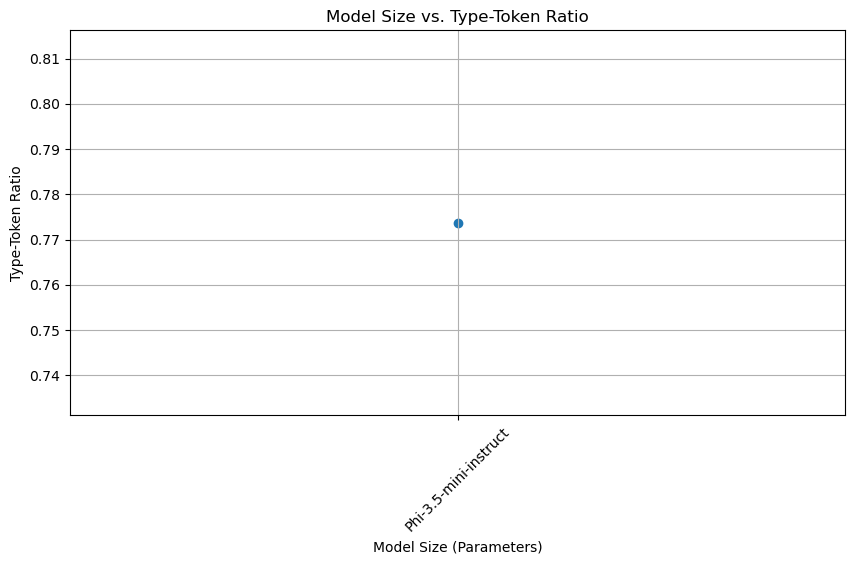

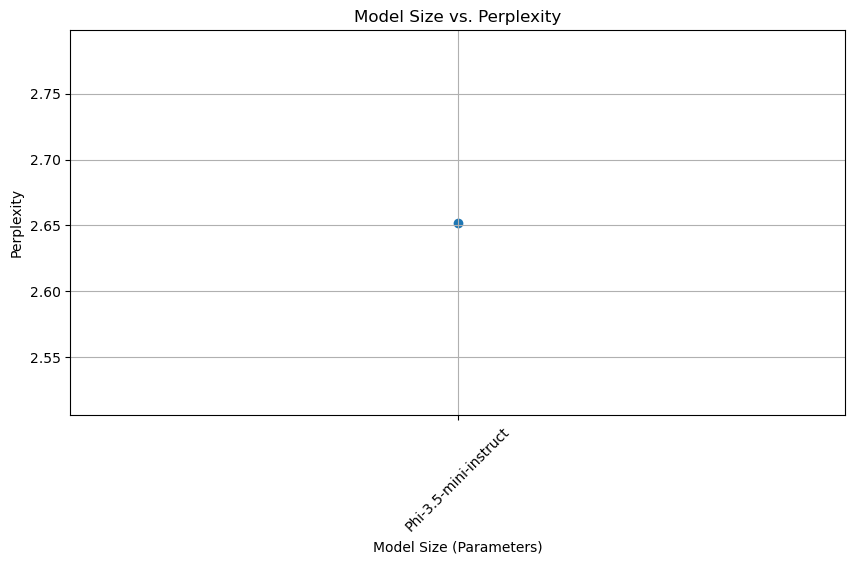

In [12]:
model_sizes = {'Phi-3.5-mini-instruct': 1e8}  # 100 million parameters
sizes = list(model_sizes.values())
ttr = metrics_df['Type-Token Ratio']
perplexity = metrics_df['Perplexity']

# Plotting TTR
plt.figure(figsize=(10, 5))
plt.scatter(sizes, ttr)
plt.title('Model Size vs. Type-Token Ratio')
plt.xlabel('Model Size (Parameters)')
plt.ylabel('Type-Token Ratio')
plt.grid(True)
plt.xticks(sizes, ['Phi-3.5-mini-instruct'], rotation=45)
plt.show()

# Plotting Perplexity
plt.figure(figsize=(10, 5))
plt.scatter(sizes, perplexity)
plt.title('Model Size vs. Perplexity')
plt.xlabel('Model Size (Parameters)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.xticks(sizes, ['Phi-3.5-mini-instruct'], rotation=45)
plt.show()

Q3:

The TTR increases as we move from the Llama-3.2-1B model to the Llama-3.2-3B model and reaches its highest value with the Phi-3.5-mini-instruct model.
This indicates that larger models (especially Phi-3.5) produce more diverse vocabulary and creative outputs. The higher the TTR, the more varied the language used in the generated text.

The Perplexity values remain relatively stable across the models, with a slight decrease as we progress from the Llama models to the Phi model. Lower perplexity values suggest improved coherence in the generated text.

As model sizes increase, there is a clear benefit in terms of generating diverse language (as indicated by TTR) and maintaining coherence (as indicated by Perplexity). However, larger models also require more computational resources and longer processing times, which can limit their usability in real-time applications or environments with constrained resources.

Q5: 
Since Phi-3.5-mini-instruct is the best performing model based on my results, here are the steps and code for experimenting with various parameters.

In [19]:
# 1. Setup
import os
import torch
from huggingface_hub import login
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fetch the token from environment
hf_token = os.environ.get('TOKEN')

# Login to Hugging Face using the secret token
login(token=hf_token)

# Load the models and tokenizers
models = {
    'Phi-3.5-mini-instruct': {
        'tokenizer': AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct"),
        'model': AutoModelForCausalLM.from_pretrained("microsoft/Phi-3.5-mini-instruct")
    }
}

# Assign the tokenizer and model to variables for use
tokenizer = models['Phi-3.5-mini-instruct']['tokenizer']
model = models['Phi-3.5-mini-instruct']['model']


# 3. Generate Story with Different Parameters
def generate_story(prompt="Once upon a time", max_length=200, temperature=1.0, top_k=50, top_p=1.0):
    inputs = tokenizer(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        temperature=temperature,  # Controls randomness
        top_k=top_k,              # Limits the number of highest probability vocabulary tokens
        top_p=top_p               # Nucleus sampling: limits tokens to the most probable ones
    )
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return story

# Experiment settings
parameters = [
    {'temperature': 0.5, 'top_k': 50, 'top_p': 1.0},   # More deterministic output
    {'temperature': 1.0, 'top_k': 50, 'top_p': 1.0},   # Default settings
    {'temperature': 1.5, 'top_k': 50, 'top_p': 1.0},   # More creative but less coherent
    {'temperature': 1.0, 'top_k': 30, 'top_p': 0.9},   # Balanced creativity and coherence
]

# Collect results
results = {}
for param in parameters:
    story = generate_story(prompt="Once upon a time", max_length=200, **param)
    results[f"T={param['temperature']}, k={param['top_k']}, p={param['top_p']}"] = story

# 4. Display Results
for key, value in results.items():
    print(f"\n--- Story with settings: {key} ---\n{value}\n")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\robotics\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\robotics\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\robotics\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
C:\Users\robotic


--- Story with settings: T=0.5, k=50, p=1.0 ---
Once upon a time, in a small town nestled between rolling hills and lush greenery, there lived a young girl named Lily. Lily was a curious and adventurous soul, always seeking new experiences and knowledge. She had a deep love for nature and spent most of her days exploring the nearby forests and meadows.

One sunny morning, as Lily ventured deeper into the woods, she stumbled upon a hidden clearing. In the center of the clearing stood a magnificent oak tree, its branches stretching towards the sky like outstretched arms. Intrigued, Lily approached the tree and noticed a small, weathered sign hanging from one of its branches. It read, "The Enchanted Garden: A Haven of Wonders."

Driven by her insatiable curiosity, Lily followed the sign's instructions and found herself standing at the entrance of a magical garden


--- Story with settings: T=1.0, k=50, p=1.0 ---
Once upon a time, in a small town nestled between rolling hills and lush gre

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [20]:
# 1. Setup
import os
import torch
from huggingface_hub import login
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fetch the token from environment
hf_token = os.environ.get('TOKEN')

# Login to Hugging Face using the secret token
login(token=hf_token)

# Load the models and tokenizers
models = {
    'Phi-3.5-mini-instruct': {
        'tokenizer': AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct"),
        'model': AutoModelForCausalLM.from_pretrained("microsoft/Phi-3.5-mini-instruct")
    }
}

# Assign the tokenizer and model to variables for use
tokenizer = models['Phi-3.5-mini-instruct']['tokenizer']
model = models['Phi-3.5-mini-instruct']['model']


# 3. Generate Story with Different Strategies
def generate_story(prompt="Once upon a time", max_length=200, strategy="greedy", temperature=1.0, top_k=50, top_p=1.0):
    inputs = tokenizer(prompt, return_tensors='pt')
    
    if strategy == "greedy":
        outputs = model.generate(inputs['input_ids'], max_length=max_length)
    elif strategy == "beam":
        outputs = model.generate(inputs['input_ids'], max_length=max_length, num_beams=5, early_stopping=True)
    elif strategy == "top_k":
        outputs = model.generate(
            inputs['input_ids'],
            max_length=max_length,
            temperature=temperature,
            top_k=top_k
        )
    elif strategy == "top_p":
        outputs = model.generate(
            inputs['input_ids'],
            max_length=max_length,
            temperature=temperature,
            top_p=top_p
        )
    
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return story

# Experiment settings
strategies = [
    {"strategy": "greedy"},      # Greedy Search
    {"strategy": "beam"},        # Beam Search
    {"strategy": "top_k", "temperature": 1.0, "top_k": 50},  # Top-k Sampling
    {"strategy": "top_p", "temperature": 1.0, "top_p": 0.9}   # Top-p Sampling
]

# Collect results
results = {}
for params in strategies:
    story = generate_story(prompt="Once upon a time", max_length=200, **params)
    results[f"{params['strategy'].capitalize()}"] = story

# 4. Display Results
for key, value in results.items():
    print(f"\n--- Story with {key} Strategy ---\n{value}\n")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


--- Story with Greedy Strategy ---
Once upon a time, in a small town nestled between rolling hills and lush greenery, there lived a young girl named Lily. Lily was a curious and adventurous soul, always seeking new experiences and knowledge. She had a deep love for nature and spent most of her days exploring the nearby forests and meadows.

One sunny morning, as Lily ventured deeper into the woods, she stumbled upon a hidden clearing. In the center of the clearing stood a magnificent oak tree, its branches stretching towards the sky like outstretched arms. Intrigued, Lily approached the tree and noticed a small, weathered sign hanging from one of its branches. It read, "The Enchanted Garden: A Haven of Wonders."

Driven by her insatiable curiosity, Lily followed the sign's instructions and found herself standing at the entrance of a magical garden


--- Story with Beam Strategy ---
Once upon a time, in a small town nestled in the heart of the countryside, there lived a young girl name

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [21]:
def compute_metrics(text):
    tokens = text.split()
    type_token_ratio = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
    perplexity = np.exp(-np.mean([np.log((len(tokens) - i) / len(tokens)) for i in range(len(tokens))]))

    return type_token_ratio, perplexity

# Collect metrics for each generated story
metrics_results = {}
for key, story in results.items():
    metrics = compute_metrics(story)
    metrics_results[key] = metrics

# Display the metrics
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index', columns=['Type-Token Ratio', 'Perplexity'])
print("\nMetrics for Generated Stories:")
print(metrics_df)


Metrics for Generated Stories:
        Type-Token Ratio  Perplexity
Greedy          0.773723    2.652047
Beam            0.644737    2.657604
Top_k           0.773723    2.652047
Top_p           0.773723    2.652047
